<a href="https://colab.research.google.com/github/An201401004/Music-Genre-Classification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras as k

Reading the CSV file

In [ ]:
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


About the Dataset

In [ ]:
df.shape

(9990, 60)

In [ ]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df = df.drop(labels = 'filename', axis = 1)

In [ ]:
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


Understanding the Audio Files

In [ ]:
audio_recording = "/content/classical.00007.wav"
data , sr = librosa.load(audio_recording)
print(type(data), type(sr))

In [ ]:
data , sr = librosa.load(audio_recording)

In [ ]:
librosa.load(audio_recording, sr = 45600)

Audio Library 

In [ ]:
import IPython

In [ ]:
IPython.display.Audio(data, rate = sr)

Visualizing Audio Files

Raw Wave File

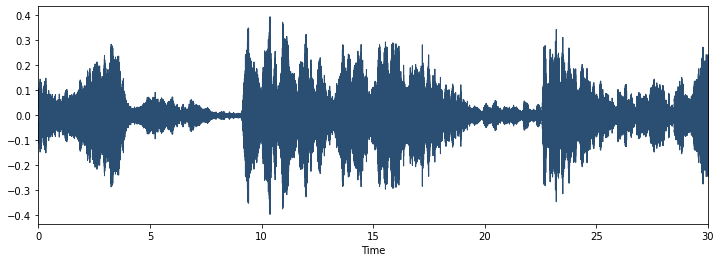

In [ ]:
plt.figure(figsize = (12,4))
librosa.display.waveplot(data, color = '#2B4F72')
plt.show()

Spectogram

In [ ]:
stft = librosa.stft(data)
stftf_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (14, 6))
librosa.display.specshow(stft, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (14, 6))
librosa.display.specshow(stft_db, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

Spectral Rolloff

In [ ]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr = sr)[0]
plt.figure(figsize = (12, 4))
librosa.display.waveplot(data, sr = sr, alpha = 0.4, color = '#2B4F72')

Chroma Feature

In [ ]:
import librosa.display as lplt
chr = librosa.feature.chroma_stft(data, sr = sr)
plt.figure(figsize = (15, 6))
lplt.specshow(chr, sr = sr, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

Zero Crossing Rate

In [ ]:
start = 1000
end = 1100
plt.figure(figsize = (11, 5))
plt.plot(data[start:end], color = '#2B4F72')
plt.grid()

In [ ]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad = False)
print('The numberof zero-crossing is :', sum(zero_cross_rate))

Feature Extraction

In [ ]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()

In [ ]:
y = convertor.fit_transform(class_list)
y

In [ ]:
print(df.iloc[:, :-1])

Scaling the Features

In [ ]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

Dividing into Test and Train Datasets

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.40)

In [ ]:
len(y_train)

In [ ]:
len(y_test)

Building the Model

In [ ]:
from keras.models import Sequential

In [ ]:
def trainModel(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer = optimizer,
                loss = 'sparse_categorical_crossentropy',
                metrics = 'accuracy'
                )
  return model.fit(X_train, y_train, validation_data = (X_test, y_test), 
                   epochs = epochs, batch_size = batch_size)

In [ ]:
def plotValidate(history):
  print("Validation Accuracy", max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize = (12,6))
  plt.show()

In [ ]:
model = k.models.Sequential([
    k.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation = 'relu'),
    k.layers.Dropout(0.2),
 
    k.layers.Dense(128, activation = 'relu'),
    k.layers.Dropout(0.2),
  
    k.layers.Dense(64, activation = 'relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation = 'softmax'),
])
print(model.summary())
model_history = trainModel(model = model, epochs = 200, optimizer = 'adam')

Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 128)
print('\nThe test loss is :', test_loss)
print('\nThe Best test accuracy is :', test_acc*100)

In [ ]:
model.predict(X_test)